### Importar librerías

In [176]:
import pandas as pd
import numpy as np

import ast

from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



### Cargar y preparar los datos

In [177]:
# Cargamos el dataset
df = pd.read_csv('../datos/df_.csv')
df.head()

,imagen,vel alambre,flujo gas,peri voltaje,voltaje,corriente,ubicacion,pixeles,mm_por_pixel,punto_referencia_x,...,coordenada_y_punto 10,coordenada_x_punto 11,coordenada_y_punto 11,coordenada_x_punto 12,coordenada_y_punto 12,coordenada_x_punto 13,coordenada_y_punto 13,coordenada_x_punto 14,coordenada_y_punto 14,matriz
0,Cordon11_Seccion 1 horizontal C11.jpg,5.0,5.0,5.0,5.0,5.0,1,196.002551,65.334184,442,...,66,569,100,615,144,645,197,654,254,"[[1, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, ..."
1,Cordon12_Seccion 1 horizontal C12.jpg,4.0,4.0,4.0,4.0,4.0,1,197.002538,65.667513,428,...,31,545,58,577,83,609,129,625,182,"[[1, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, ..."
2,Cordon17_Seccion 1 horizontal C17.jpg,4.0,4.0,4.0,4.0,4.0,1,176.002841,58.667614,401,...,146,626,180,636,206,638,236,637,266,"[[1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, ..."
3,Cordon8_Seccion 1 horizontal C8.jpg,2.0,2.0,2.0,2.0,2.0,1,95.005263,31.668421,359,...,105,431,116,434,127,440,135,441,144,"[[0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, ..."
4,Cordon3_Seccion 1 horizontal C3.jpg,3.0,3.0,3.0,3.0,3.0,1,128.003906,42.667969,460,...,134,593,154,600,179,604,201,610,223,"[[1, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, ..."


### Preprocesamiento de los datos

In [201]:
# Separamos las variables de entrada y salida
columnas_entrada = ['vel alambre', 'flujo gas', 'peri voltaje', 'voltaje', 'corriente', 'ubicacion']

# Conjunto de entrada
X = df[columnas_entrada]

# Conjunto de salida
y = df['matriz']
print(y[0].shape)

AttributeError: 'str' object has no attribute 'shape'

### Convertir las matrices de salida a un formato adecuado

In [207]:

# Convertir cada cadena a una lista de listas numéricas
y_cleaned = y.apply(ast.literal_eval)


# Convertir cada matriz a un array de NumPy y aplanar
y_processed = np.array([np.array(matrix).flatten() for matrix in y_cleaned])
print(y_processed.shape)

(54, 48)


In [202]:
# Convertir y_processed a tipo flotante
y_processed = y_processed.astype(np.float32)

# Verificar nuevamente la forma y los tipos de datos
print('Forma de y_processed después de la conversión:', y_processed.shape)
print('Tipos de datos de y_processed después de la conversión:', y_processed.dtype)

Forma de y_processed después de la conversión: (54, 48)
Tipos de datos de y_processed después de la conversión: float32


In [205]:
# Conjunto de entrada
print('Conjunto de entrada')
print(X.head())

# Salto de linea
print('\n')

# Conjunto de salida
print('Conjunto de salida')
print("Forma de y:", y.shape)
print(y_processed[0].shape)

Conjunto de entrada
   vel alambre  flujo gas  peri voltaje  voltaje  corriente  ubicacion
0          5.0        5.0           5.0      5.0        5.0          1
1          4.0        4.0           4.0      4.0        4.0          1
2          4.0        4.0           4.0      4.0        4.0          1
3          2.0        2.0           2.0      2.0        2.0          1
4          3.0        3.0           3.0      3.0        3.0          1


Conjunto de salida
Forma de y: (54,)
(48,)


In [182]:
# Convertimos todos los valores a float32
X = X.astype(np.float32)

### Normalización de los datos

In [183]:
# Normalizar los datos de entrada
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

In [184]:
print("Datos originales:")
print(X[:2])
print("\nDatos escalados:")
print(X_scaled[:2])

Datos originales:
   vel alambre  flujo gas  peri voltaje  voltaje  corriente  ubicacion
0          5.0        5.0           5.0      5.0        5.0        1.0
1          4.0        4.0           4.0      4.0        4.0        1.0

Datos escalados:
[[1.        1.        1.        1.        1.        0.       ]
 [0.6666667 0.6666667 0.6666667 0.6666667 0.6666667 0.       ]]


### Dividir los datos en conjuntos de entrenamiento y prueba

In [185]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_processed, test_size=0.2, random_state=42)

In [186]:
# Imprimir las formas
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (43, 6)
Forma de X_test: (11, 6)
Forma de y_train: (43, 48)
Forma de y_test: (11, 48)


### Crear el modelo

In [195]:
# Número de características
num_features = X_train.shape[1]

funciones_activacion = ['relu', 'sigmoid', 'tanh']
activation_hidden_layer = funciones_activacion[0]  # Capas ocultas
activation_output_layer = funciones_activacion[1]  # Capa de salida

# Crear el modelo
model = Sequential([
    Dense(64, activation=activation_hidden_layer, input_shape=(num_features,)),
    Dense(32, activation=activation_hidden_layer),
    Dense(y_processed.shape[1], activation=activation_output_layer)
])

In [197]:
print(y_processed.shape[1])

48


In [188]:
# Compilar el modelo

# Crear el optimizador con una tasa de aprendizaje ajustada
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

### Entrenar el modelo

In [189]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
2/2 - 1s - loss: 0.2545 - mean_absolute_error: 0.5033 - 1s/epoch - 562ms/step
Epoch 2/100
2/2 - 0s - loss: 0.2526 - mean_absolute_error: 0.5015 - 10ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 0.2508 - mean_absolute_error: 0.4998 - 7ms/epoch - 3ms/step
Epoch 4/100
2/2 - 0s - loss: 0.2491 - mean_absolute_error: 0.4983 - 7ms/epoch - 3ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2477 - mean_absolute_error: 0.4969 - 7ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2463 - mean_absolute_error: 0.4955 - 7ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2449 - mean_absolute_error: 0.4941 - 8ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.2434 - mean_absolute_error: 0.4925 - 8ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.2418 - mean_absolute_error: 0.4908 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.2401 - mean_absolute_error: 0.4889 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.2382 - mean_absolute_error: 0.4867 - 7ms/epoch - 4ms/step
Epoch 12/100
2/2 

### Evaluar el modelo

In [190]:
# Evaluar el modelo en el conjunto de datos de prueba
loss, mae = model.evaluate(X_test, y_test)
print(f'Loss (MSE): {loss},\n MAE: {mae}')

1/1 [==============================] - 0s 145ms/step - loss: 0.1124 - mean_absolute_error: 0.2348
Loss (MSE): 0.11241216957569122,
 MAE: 0.23477983474731445


### Visualizar del entrenamiento

In [193]:
# Obtener el historial de pérdida y métricas
loss = history.history['loss']
mae = history.history['mean_absolute_error']

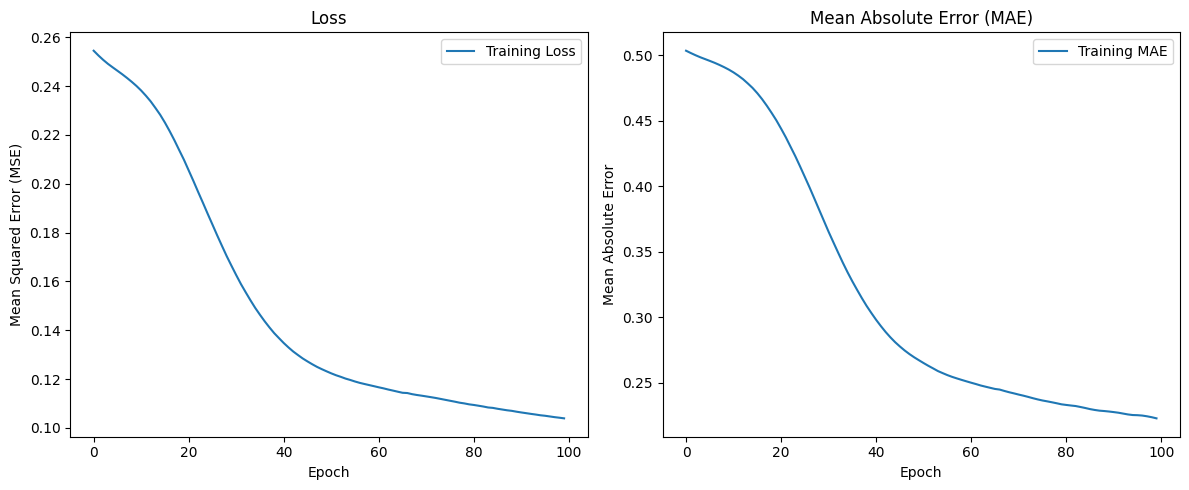

In [194]:
# Crear gráficos
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()

### Predicciones